

# 项目：探索性数据分析`未前往就诊的预约挂号`

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介


### 数据集的简介

`未前往就诊的挂号预约`指一个人预约了医生，收到了所有的指示却没有按约去医院就诊。该数据集包含11万条巴西病人预约挂号的求诊信息，每行数据包含有关患者特点的14个变量，具体有：
- PatientId：病人ID，
- AppointmentID：预约流水号ID，
- Gender：预约者的性别，
- ScheduledDay：作出预约的具体时间，
- AppointmentDay：预约的就诊日期，
- Age：病人年龄，
- Neighbourhood：医院所在位置，
- Scholarship：是否参加巴西福利项目 [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 
- Hipertension： 是否是高血压，
- Diabetes：是否是糖尿病，
- Alcoholism：是否是酗酒，
- Handcap：是否是残障，
- SMS_received：病人是否收到短信通知，
- No-show：`no`表示病人如约就诊，`yes`表示病人没有前往就诊。

### 问题

- 病人的年龄是如何分布的？哪个年龄段的病人更多？
- 未按约去就诊的病人有多少？占多大的比例？
- 人们一般会预约在一周的哪一天就诊？
- 一天中的哪个时段，预约的人最多？
- 一般会提前几天预约挂号，即病人等待就诊的时长是多久？
- 哪些重要因素会影响病人是否如约去就诊？例如，年龄，性别，是否参加福利项目，一周中的哪天就诊等



In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [2]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


查看数据集中有哪些列

In [3]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


0

查看数据集是否有缺失值、重复值以及每列的数据类型。共14列，每列都是110527个值，不存在缺失值，也不存在重复值。

In [4]:
df.describe()
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

检查异常值，发现年龄的最小值有误。


### 数据清理

#### 1、将所有列名统一修改成小写并以下划线连接，便于操作。

In [5]:

df.rename(columns=lambda x: x.strip().lower().replace('-','_'), inplace=True )
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### 2、删除与问题无关的列

要删除的列包括：
- PatientId：病人ID，
- neighbourhood: 医院位置
- Hipertension： 是否是高血压，
- Diabetes：是否是糖尿病，
- Alcoholism：是否是酗酒，
- Handcap：是否是残障，
- SMS_received：病人是否收到短信通知，

In [6]:
df.drop(['patientid','hipertension','diabetes','alcoholism','handcap','sms_received','neighbourhood'], axis=1, inplace= True)
df.tail(2)

,appointmentid,gender,scheduledday,appointmentday,age,scholarship,no_show
110525,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,No
110526,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,0,No


#### 3、处理异常值。

通过上面的观察发现`age`列的最小值为-1，最大值为115。最小值明显是错误值，而最大值不确定是否有误，但我觉得它可能是真实的，所以应该保留。

In [7]:
df = df[df['age'] > 0]
df.age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

#### 4、对`age`列进行并分段，创建新的列 `age_group`

In [8]:
bin_labels = ['Teenager','Young','Middle','Old']
bin_edges = [0,19,38,56,116]
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_labels) 
df['age_group'].isnull().sum()

0

<a id='eda'></a>
## 探索性数据分析


### 问题 1：病人的年龄是如何分布的？哪个年龄段的病人更多？

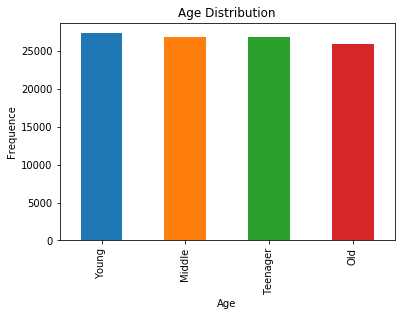

In [9]:

plt.subplots(figsize=(6,4))
df['age_group'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequence');

可以看到发出预约挂号的病人中，青年人最多，其次是中年人和青少年，老年人最少。

### 问题2：未按约去就诊的病人有多少？占多大的比例？

No     85307
Yes    21680
Name: no_show, dtype: int64


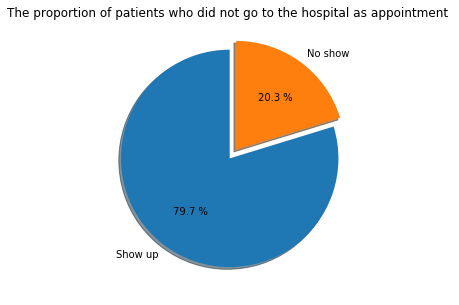

In [10]:

x_vaule = df['no_show'].value_counts()
print(x_vaule)
labels = 'Show up','No show'
explode = [0, 0.1]
plt.subplots(figsize=(5,5))
plt.axes(aspect=1)
# 设置饼图样式，标签，突出显示，圆上文本格式，显示阴影，文本位置离圆心距离，起始角度，百分比的文本离圆心距离
plt.pie(x=x_vaule, labels=labels,explode=explode,autopct='%.1f %%', shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6 )
plt.title('The proportion of patients who did not go to the hospital as appointment ');


通过统计函数可以得出未按约定到医院就诊的病人有21680人，观察饼图可以知道，该人数占据总预约人数的20.3%。

### 问题3：人们一般会预约在一周的哪一天就诊？

In [11]:
# 先将预约日期转换成日期类型，然后换成一周表示
df['appointmentday'] = pd.to_datetime(df['appointmentday'], errors='coerce')
df['appointment_weekday'] =df['appointmentday'].dt.weekday_name 

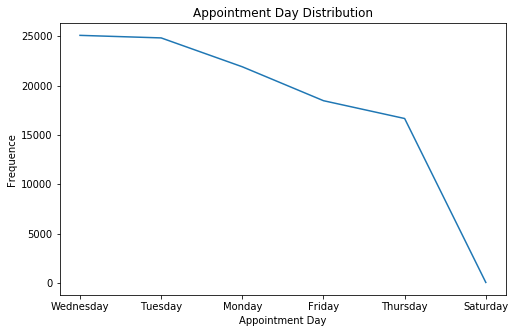

In [12]:

plt.subplots(figsize=(8,5))
plt.plot(df['appointment_weekday'].value_counts().keys(),df['appointment_weekday'].value_counts().values)
plt.title('Appointment Day Distribution')
plt.xlabel('Appointment Day')
plt.ylabel('Frequence');

可以看到，人们更喜欢在星期三就诊，其次是星期二，星期四和星期五预约就诊的人相对少些，星期六的人最少。这里没有出现星期天，也许是因为星期天是休息日。

### 问题4：一天中的哪个时段，预约的人最多？

In [13]:
#先将scheduleday处理成日期类型，然后提取小时
df['scheduledday'] = pd.to_datetime(df['scheduledday'], errors='coerce')
df['scheduledhour'] = df['scheduledday'].dt.hour
# df['scheduledhour'].describe()

#将一天的时间分成三个时段，上午，下午，晚上
bin_labels = ['Morning','Afternoon','Night']
bin_edges = [5,12,18,22]
df['scheduledhour_cut'] = pd.cut(df['scheduledhour'], bin_edges, labels=bin_labels) 
# df['scheduledhour_cut'].isnull().sum()
df['scheduledhour_cut'].value_counts()

Morning      71568
Afternoon    34831
Night          588
Name: scheduledhour_cut, dtype: int64

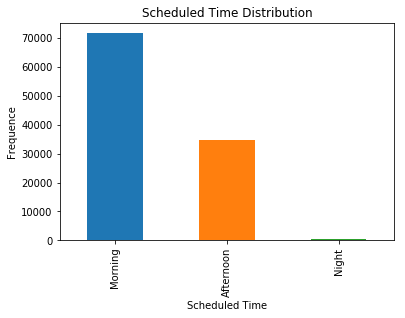

In [14]:
plt.subplots(figsize=(6,4))
df['scheduledhour_cut'].value_counts().plot(kind='bar')
plt.title('Scheduled Time Distribution')
plt.xlabel('Scheduled Time')
plt.ylabel('Frequence');

可以看到，绝大多数的病人选择在上午预约，一部分病人选择在下午预约，极少病人选择在晚上预约。一般下午6点以后，医院的医生可能已经下班了，预约成功的几率会下降。

### 问题5：一般会提前几天预约挂号，即病人等待就诊的时长是多久？

In [15]:
df['waittime'] = df['appointmentday'].dt.date - df['scheduledday'].dt.date
df['waittime'].describe()

count                     106987
mean     10 days 04:00:04.710852
std      15 days 06:19:27.050399
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             14 days 00:00:00
max            179 days 00:00:00
Name: waittime, dtype: object

得到的`等待时长`出现了负数值，这些值应该是错误的。至于`等待时长`很大的数据，不确定是否是错误的。这里留下那些等待时长`大于等于0天`的数据。

In [16]:
df = df[df['appointmentday'].dt.date >= df['scheduledday'].dt.date]

In [17]:
df['waittime'] = (df['appointmentday'].dt.date - df['scheduledday'].dt.date)
df['waittime'].describe()

count                     106982
mean     10 days 04:00:53.840833
std      15 days 06:19:37.756884
min              0 days 00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             14 days 00:00:00
max            179 days 00:00:00
Name: waittime, dtype: object

人们平均提前10天预约，大多数人提前一星期预约，等待时长最短是0天，即当天预约当天就诊，等待时长最久的是179天。

### 问题6：哪些重要因素会影响病人是否如约去就诊？
例如，年龄，性别，是否参加福利项目，一周中的就诊时间等

计算去就诊和未去就诊的人数的比例函数

In [18]:
def cal_proportion(col_name):
    """按传入的列与no-show分组，统计不同类的数量，并计算各类的比例
    """
    counts = df.groupby(['no_show',col_name]).count()['appointmentid']
    total = df.groupby(['no_show']).count()['appointmentid']
    no_show_proportions = counts['Yes'] / total['Yes']
    show_proportions = counts['No']/ total['No']
    return no_show_proportions,show_proportions

绘制图形函数

In [19]:
def double_bar(bar_data1,bar_data2,xlabels,xtick_label):
    # 绘制条柱,先设置每个等级组的x坐标位置和每个条柱的宽度
    ind = np.arange(len(bar_data1))
    width = 0.35
    red_bar = plt.bar(ind,bar_data1, width, color='r', alpha=0.7, label='No show')
    blue_bar = plt.bar(ind+width, bar_data2, width, color='b',alpha=0.7, label='Show up')

    # 标题和标签
    plt.ylabel('Proportion')
    plt.xlabel(xlabels)
    plt.title('Proportion by '+ xlabels + ' and No-Show')
    locations = ind + width / 2  # x 坐标刻度位置
    plt.xticks(locations, xtick_label)

    # 图例
    plt.legend()

#### 6.1 不同年龄段的病人，如约去就诊的情况怎么样？

计算各个年龄段，按约去就诊的比例和未按约去就诊的比例

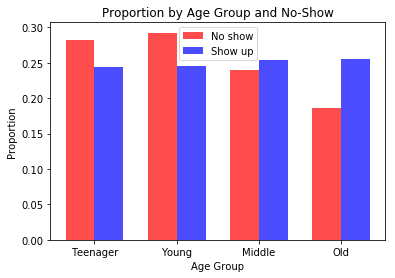

In [20]:
no_show = cal_proportion('age_group')[0]
show_up = cal_proportion('age_group')[1]
xtick_label =  ['Teenager', 'Young', 'Middle', 'Old']
double_bar(no_show,show_up,'Age Group',xtick_label)

通过上图可以看到，不同年龄段的病人如约去就诊的比例是不同的。年龄越高，去就诊的比例比未去就诊的比例就越高，而青少年和年轻人则是未去就诊的比例高于按约去就诊的比例。

#### 6.2 不同性别的病人，如约去就诊的情况怎么样？

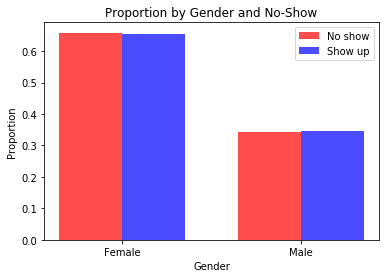

In [21]:
no_show = cal_proportion('gender')[0]
show_up = cal_proportion('gender')[1]
xtick_label = ['Female', 'Male'] 
double_bar(no_show,show_up,'Gender',xtick_label)

看起来，男女患者去医院就诊的概率相似。但在所有患者里，女性预约患者更多。

#### 6.3 是否参加福利项目，影响患者如约去就诊吗？

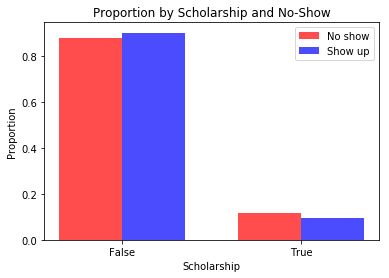

In [22]:

no_show = cal_proportion('scholarship')[0]
show_up = cal_proportion('scholarship')[1]
xtick_label = ['False', 'True']
double_bar(no_show,show_up,'Scholarship',xtick_label)

可以看到，未参加巴西福利项目的病人更倾向于按约就诊；而参加了巴西福利项目的病人按约就诊的比例低于未按约就诊的比例。还可以清楚地看到，绝大多数的病人并没有参加福利项目。

#### 6.4 在一周的哪天就诊，是否会影响病人如约去就诊？

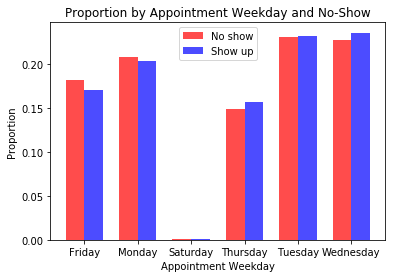

In [23]:

no_show = cal_proportion('appointment_weekday')[0]
show_up = cal_proportion('appointment_weekday')[1]
xtick_label = ['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']
double_bar(no_show,show_up,'Appointment Weekday',xtick_label)

除开星期六外，病人更喜欢在星期四、星期二和星期三如约去就诊；而约在星期五和星期一的病人，未去就诊的比例更高。同时也可以知道，更多的病人选择在星期二和星期三就诊。

<a id='conclusions'></a>
## 结论

> **实验结果**：在所有这些病人中，女性病人和中老年病人更关注身体健康，年龄越大，更愿意按约去就诊。人们一般倾向于在星期二和星期三的上午去就诊，有的病人会提前很久就预约医生，而大多数的病人会在预约当天去就诊。病人的年龄、病人是否参加福利项目以及在一周的哪天去就医这几个因素会影响病人是否按约去医院就诊。

> **数据本身的局限性**：数据中还提供了病人患的几种病，例如，高血压，酗酒，糖尿病等，还提供了医院的地理位置，病人是否患这些病和医院的位置可能也会影响他们能否按约去医院就诊。此外，病人等待的时间长短，可能也会影响他是否按约去就诊。本次项目，暂时未作这三方面的探究，只对目前感兴趣的问题做了分析。

> **探索方式局限性**：本次项目探索使用的只是一些简单的统计计算和可视化分析。这样得出的结论只能是暂时的，还有进一步验证的需要（使用统计检验或者机器学习建模等）。